In [16]:
from ultralytics import YOLO
from PIL import Image
import os
import glob
import cv2
from pytube import YouTube
from IPython.display import display, Video

In [10]:


def convert(size, box):
    dw = 1./size[0]
    dh = 1./size[1]
    x = (box[0] + box[1])/2.0
    y = (box[2] + box[3])/2.0
    w = box[1] - box[0]
    h = box[3] - box[2]
    x = x*dw
    w = w*dw
    y = y*dh
    h = h*dh
    return [x, y, w, h]

def convert_annotation(image_width, image_height, annotation):
    class_name, x_min, y_min, x_max, y_max = annotation
    bbox = convert((image_width, image_height), (float(x_min), float(x_max), float(y_min), float(y_max)))
    return f'0 {bbox[0]} {bbox[1]} {bbox[2]} {bbox[3]}'

# path to your label files and corresponding images
label_path = 'C:/Users/Jacki/anaconda mini/Alpaca/OIDv4_ToolKit/OID/Dataset/train/Alpaca/labels'
image_path = 'C:/Users/Jacki/anaconda mini/Alpaca/OIDv4_ToolKit/OID/Dataset/train/Alpaca/images'
all_files = glob.glob(os.path.join(label_path, '*.txt'))

for file in all_files:
    with open(file, 'r') as f:
        lines = f.readlines()

    # Load the corresponding image to get its width and height
    image_file = os.path.join(image_path, os.path.basename(file).replace('.txt', '.jpg'))  # adjust the extension according to your images
    with Image.open(image_file) as img:
        image_width, image_height = img.size

    new_lines = []
    for line in lines:
        line = line.strip().split()
        new_line = convert_annotation(image_width, image_height, line)
        new_lines.append(new_line)

    with open(file, 'w') as f:
        f.write('\n'.join(new_lines))

In [18]:
model = YOLO("yolov8n.pt")
result = model.train(data = "C:/Users/Jacki/anaconda mini/Alpaca/OIDv4_ToolKit/OID/Dataset/train/yaml.yaml", epochs = 40, batch = 16, conf = 0)


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       1/40         0G      3.121      3.427      4.169         10        640: 100%|██████████| 57/57 [02:32<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [01:04
                   all        452        829     0.0042      0.688     0.0738     0.0248

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       2/40         0G      3.099      3.326      3.962         18        640: 100%|██████████| 57/57 [02:41<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [01:04
                   all        452        829     0.0573       0.18      0.028    0.00926

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       3/40         0G      3.013      3.234      3.663         15        640: 100%|██████████| 57/57 [02

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  79%|███████▉  | 23/29 [01:37WARNING  NMS time limit 1.300s exceeded
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [02:02
                   all        452        829       0.56      0.483      0.502      0.236

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      27/40         0G       1.82      2.014       2.27         14        640: 100%|██████████| 57/57 [04:40<00:00,  4.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [01:44
                   all        452        829      0.583       0.46      0.496      0.242

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      28/40         0G      1.745      1.935      2.227         13        640: 100%|██████████| 57/57 [05:49<00:00,  6.
                 Class   

In [16]:
pip install pytube opencv-python-headless

     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ---------------------------------------- 57.6/57.6 kB 3.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [26]:
!yolo task=detect mode='val' model="C:/Users/Jacki/runs/detect/train/weights/best.pt" data="C:/Users/Jacki/anaconda mini/Alpaca/OIDv4_ToolKit/OID/Dataset/train/yaml.yaml"

Ultralytics YOLOv8.0.148  Python-3.10.9 torch-2.0.1+cpu CPU (AMD Ryzen 7 5800H with Radeon Graphics)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients

val: Scanning C:\Users\Jacki\anaconda mini\Alpaca\OIDv4_ToolKit\OID\Dataset\train\Alpaca\labels.cache... 452 images, 0 backgrounds, 0 corrupt: 100%|##########| 452/452 [00:00<?, ?it/s]
val: Scanning C:\Users\Jacki\anaconda mini\Alpaca\OIDv4_ToolKit\OID\Dataset\train\Alpaca\labels.cache... 452 images, 0 backgrounds, 0 corrupt: 100%|##########| 452/452 [00:00<?, ?it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/29 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   3%|3         | 1/29 [00:02<01:01,  2.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   7%|6         | 2/29 [00:04<00:57,  2.13s/it]
                 Class     Images  Instances      Box(P  

In [27]:
!yolo task=detect mode=predict model="C:/Users/Jacki/runs/detect/train/weights/best.pt" conf=0.25 source="C:/Users/Jacki/anaconda mini/Alpaca/OIDv4_ToolKit/OID/Dataset/train/Alpaca/images"

Ultralytics YOLOv8.0.148  Python-3.10.9 torch-2.0.1+cpu CPU (AMD Ryzen 7 5800H with Radeon Graphics)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients

image 1/452 C:\Users\Jacki\anaconda mini\Alpaca\OIDv4_ToolKit\OID\Dataset\train\Alpaca\images\000151d10b95b4d3.jpg: 448x640 1 Alpaca, 134.7ms
image 2/452 C:\Users\Jacki\anaconda mini\Alpaca\OIDv4_ToolKit\OID\Dataset\train\Alpaca\images\00417982f9807c37.jpg: 640x448 1 Alpaca, 124.4ms
image 3/452 C:\Users\Jacki\anaconda mini\Alpaca\OIDv4_ToolKit\OID\Dataset\train\Alpaca\images\00ad17d214e32d2b.jpg: 480x640 4 Alpacas, 131.0ms
image 4/452 C:\Users\Jacki\anaconda mini\Alpaca\OIDv4_ToolKit\OID\Dataset\train\Alpaca\images\0116d24f7c4167ae.jpg: 480x640 1 Alpaca, 126.4ms
image 5/452 C:\Users\Jacki\anaconda mini\Alpaca\OIDv4_ToolKit\OID\Dataset\train\Alpaca\images\017372995445ed77.jpg: 480x640 1 Alpaca, 112.0ms
image 6/452 C:\Users\Jacki\anaconda mini\Alpaca\OIDv4_ToolKit\OID\Dataset\train\Alpaca\images\019b7570b5453e72.jpg: 448x

In [28]:
!yolo task=detect mode=predict model="C:/Users/Jacki/runs/detect/train/weights/best.pt" conf=0.25 source="C:/Users/Jacki/anaconda mini/Alpaca/Alpaca Herd Goes for a Walk   Secrets of the Zoo Down Under.mp4"

Ultralytics YOLOv8.0.148  Python-3.10.9 torch-2.0.1+cpu CPU (AMD Ryzen 7 5800H with Radeon Graphics)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients

video 1/1 (1/4614) C:\Users\Jacki\anaconda mini\Alpaca\Alpaca Herd Goes for a Walk   Secrets of the Zoo Down Under.mp4: 384x640 (no detections), 106.0ms
video 1/1 (2/4614) C:\Users\Jacki\anaconda mini\Alpaca\Alpaca Herd Goes for a Walk   Secrets of the Zoo Down Under.mp4: 384x640 (no detections), 84.0ms
video 1/1 (3/4614) C:\Users\Jacki\anaconda mini\Alpaca\Alpaca Herd Goes for a Walk   Secrets of the Zoo Down Under.mp4: 384x640 (no detections), 84.0ms
video 1/1 (4/4614) C:\Users\Jacki\anaconda mini\Alpaca\Alpaca Herd Goes for a Walk   Secrets of the Zoo Down Under.mp4: 384x640 (no detections), 87.0ms
video 1/1 (5/4614) C:\Users\Jacki\anaconda mini\Alpaca\Alpaca Herd Goes for a Walk   Secrets of the Zoo Down Under.mp4: 384x640 (no detections), 81.0ms
video 1/1 (6/4614) C:\Users\Jacki\anaconda mini\Alpaca\Alpaca Herd Goe

## Download the Youtube video

In [3]:



url = 'https://www.youtube.com/watch?v=X0bE86akgmw'
yt = YouTube(url)
video_stream = yt.streams.filter(progressive=True, file_extension='mp4').first()
video_path = video_stream.download()


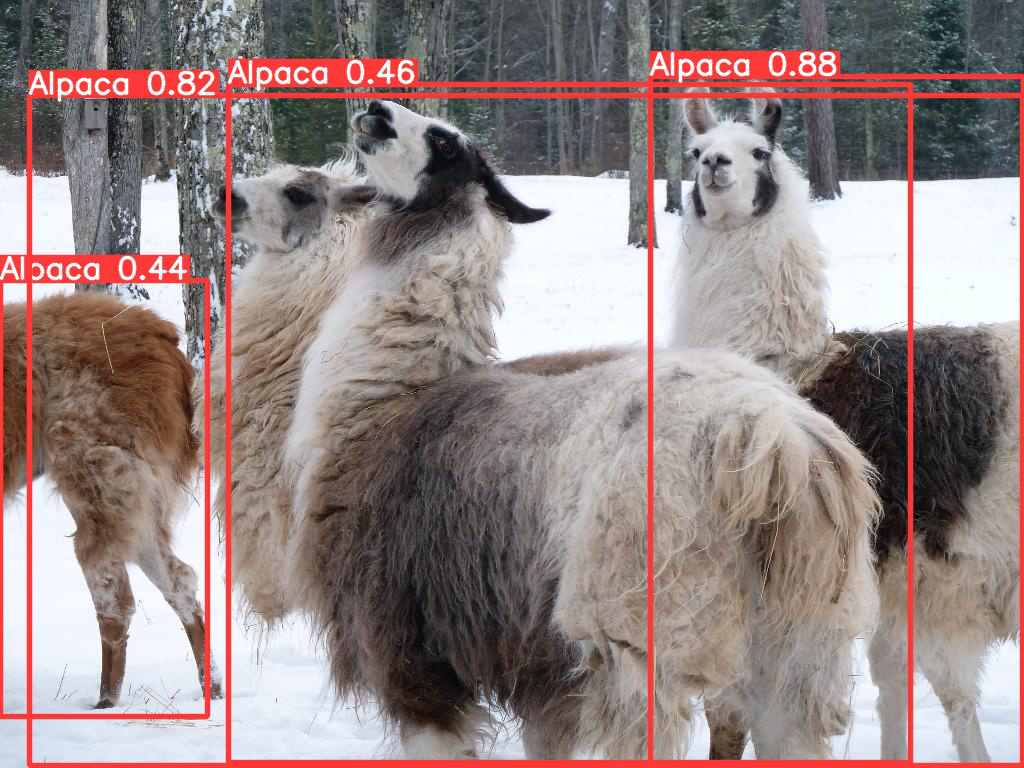

In [10]:
image_path = "C:/Users/Jacki/runs/detect/predict2/00ad17d214e32d2b.jpg"
image = Image.open(image_path)
display(image)

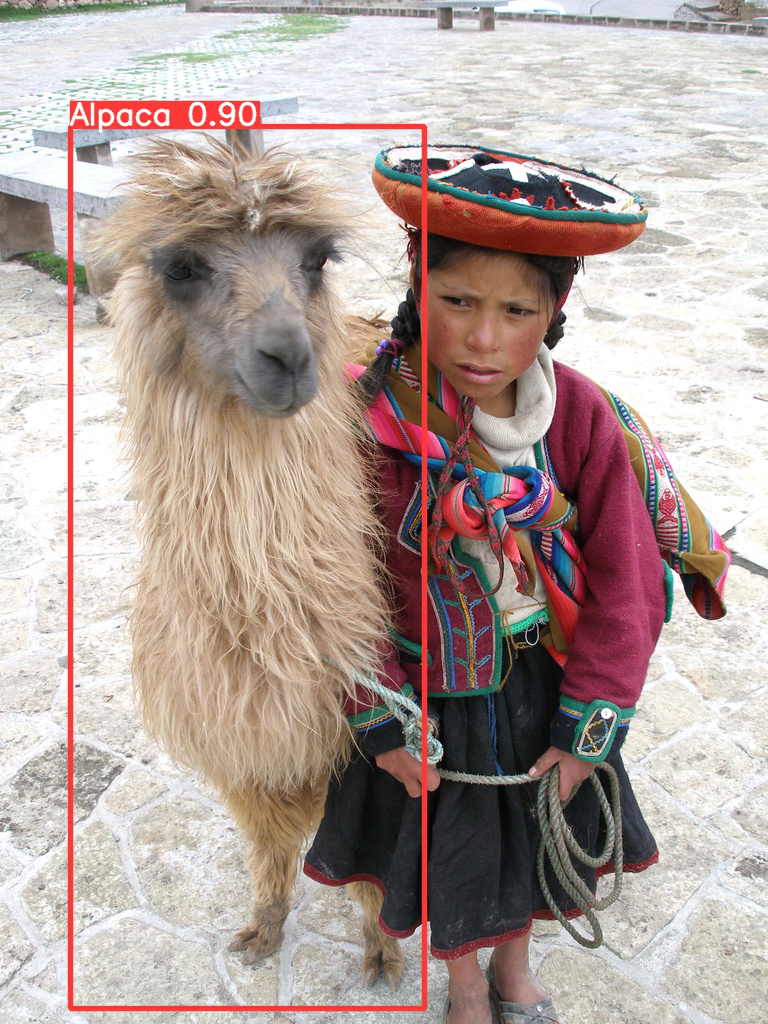

In [11]:
image_path = "C:/Users/Jacki/runs/detect/predict2/3b7ad6701d02cdb9.jpg"
image = Image.open(image_path)
display(image)

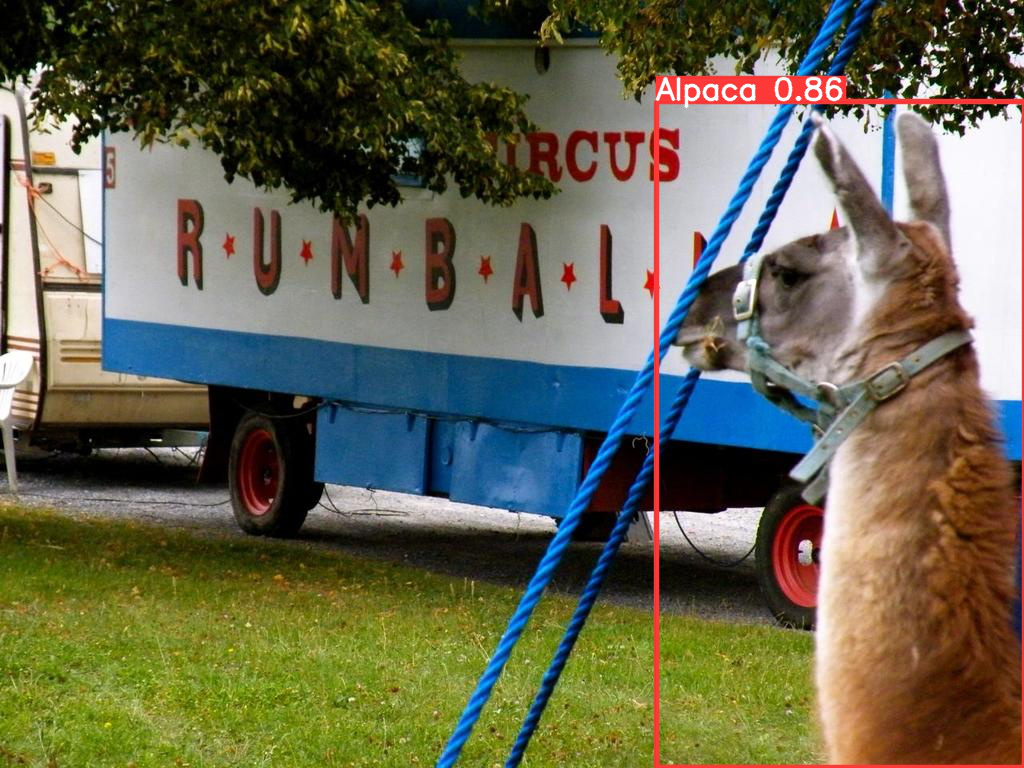

In [13]:
image_path = "C:/Users/Jacki/runs/detect/predict2/74be81708ee79413.jpg"
image = Image.open(image_path)
display(image)

## Playing Video

In [26]:
from IPython.core.display import display, HTML

# Replace the following string with your copied iframe code
iframe_str = '<iframe width="560" height="315" src="https://www.youtube.com/embed/6akkfFu9e8Y" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>'
display(HTML(iframe_str))

C:\Users\Jacki\AppData\Local\Temp\ipykernel_28328\2350624996.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML
C:\Users\Jacki\anaconda mini\sample_project_1\env\lib\site-packages\IPython\core\display.py:431: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")
